In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("net.csv")
print("basics information of the dataset")
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

basics information of the dataset
Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2

In [2]:
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Specified")
df['director'] = df['director'].fillna("Not Specified")
print("✅ Filled 'country' values:")
print(df[df['country'] == "Unknown"][['title', 'country']].head())
print("\n✅ Filled 'cast' values:")
print(df[df['cast'] == "Not Specified"][['title', 'cast']].head())
print("\n✅ Filled 'director' values:")
print(df[df['director'] == "Not Specified"][['title', 'director']].head())
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df.dropna(subset=['date_added'], inplace=True)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

✅ Filled 'country' values:
                                  title  country
2                             Ganglands  Unknown
3                 Jailbirds New Orleans  Unknown
5                         Midnight Mass  Unknown
6      My Little Pony: A New Generation  Unknown
10  Vendetta: Truth, Lies and The Mafia  Unknown

✅ Filled 'cast' values:
                                                title           cast
0                                Dick Johnson Is Dead  Not Specified
3                               Jailbirds New Orleans  Not Specified
10                Vendetta: Truth, Lies and The Mafia  Not Specified
14                    Crime Stories: India Detectives  Not Specified
16  Europe's Most Dangerous Man: Otto Skorzeny in ...  Not Specified

✅ Filled 'director' values:
                                  title       director
1                         Blood & Water  Not Specified
3                 Jailbirds New Orleans  Not Specified
4                          Kota Factory  Not S

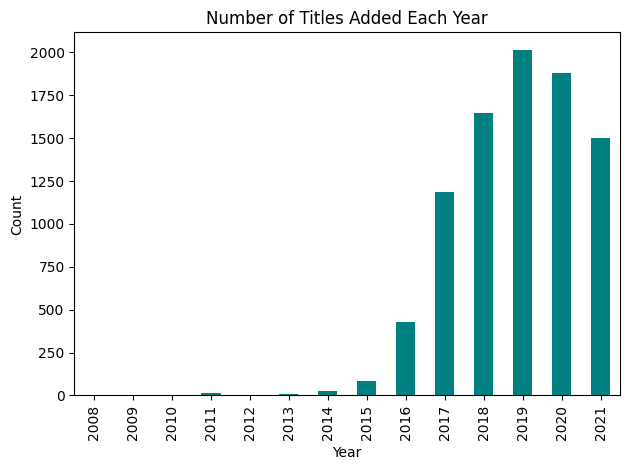

In [3]:
df['year_added'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Number of Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

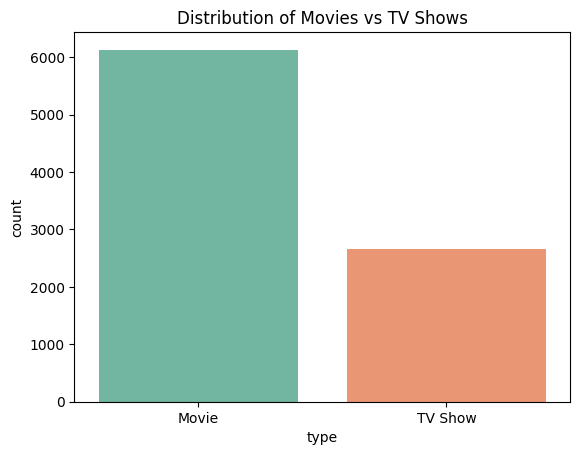

In [4]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Distribution of Movies vs TV Shows")
plt.show()

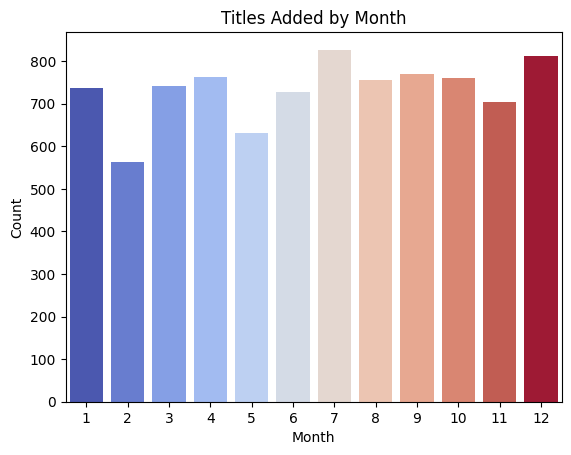

In [5]:
sns.countplot(data=df, x='month_added', hue='month_added', palette='coolwarm', legend=False)
plt.title("Titles Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

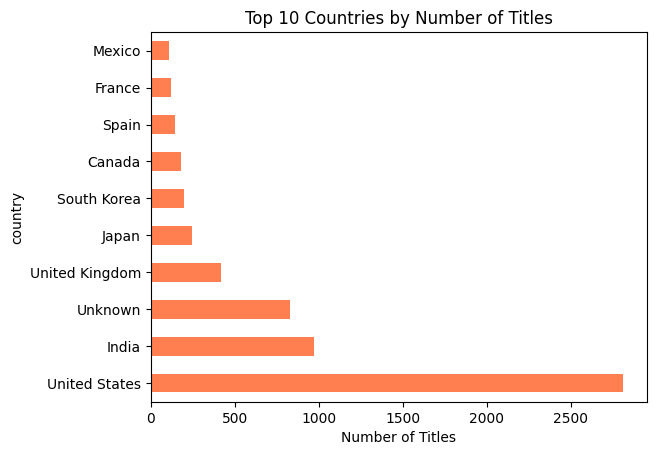

In [6]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.show()